<a href="https://colab.research.google.com/github/myracheng/155kaggle1/blob/master/dnn2_cs155miniproject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from zipfile import ZipFile 
file_name = "drive/My Drive/train.csv.zip"
  
# # opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zipF: 
    # printing all the contents of the zip file 
    zipF.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    data = zipF.extract('train.csv') 
    print('Done!')

file_name = "drive/My Drive/test.csv.zip"
  
# # opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zipF: 
    # printing all the contents of the zip file 
    zipF.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    data = zipF.extract('test.csv') 
    print('Done!')

File Name                                             Modified             Size
train.csv                                      2020-02-09 10:27:26     77009507
Extracting all the files now...
Done!
File Name                                             Modified             Size
test.csv                                       2020-02-09 10:27:26     24378147
Extracting all the files now...
Done!


In [0]:

import pandas as pd
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [0]:
from sklearn.model_selection import train_test_split
# Split test and train data
df_train = train_df
df_train['diff'] = (df_train['last_price'] - df_train['mid'])**2
df_train['avg_bid'] = (df_train['bid1'] * df_train['bid1vol'] + df_train['bid2'] * df_train['bid2vol'] + df_train['bid3'] * df_train['bid3vol'] + df_train['bid4'] * df_train['bid4vol'] + df_train['bid5'] * df_train['bid5vol']) / (df_train['bid1vol'] + df_train['bid2vol'] + df_train['bid3vol'] + df_train['bid4vol'] + df_train['bid5vol'])
df_train['avg_ask'] = (df_train['ask1'] * df_train['ask1vol'] + df_train['ask2'] * df_train['ask2vol'] + df_train['ask3'] * df_train['ask3vol'] + df_train['ask4'] * df_train['ask4vol'] + df_train['ask5'] * df_train['ask5vol']) / (df_train['ask1vol'] + df_train['ask2vol'] + df_train['ask3vol'] + df_train['ask4vol'] + df_train['ask5vol'])
df_train['diff_avg_bid'] = (df_train['last_price'] - df_train['avg_bid'])**2
df_train['diff_avg_ask'] = (df_train['last_price'] - df_train['avg_ask'])**2
df_train['diff_avg_bid_ask'] = (df_train['avg_ask'] - df_train['avg_bid'])**2

X = df_train.drop('y', axis=1)
y = df_train['y']
normalized_X=(X-X.mean())/X.std()
df_train = train_df.fillna(0)

X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, test_size=0.2, random_state=0)

# num_samples = 10000
# X_train = X_train[:num_samples]
# y_train = y_train[:num_samples]
# X_test=X_test[:int(num_samples*0.5)]
# y_test=y_test[:int(num_samples*0.5)]

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


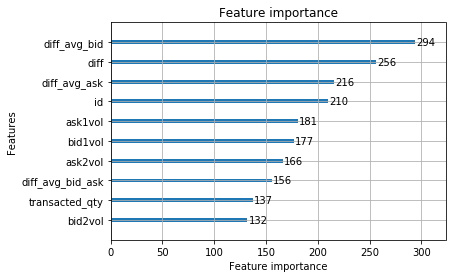

In [0]:
aimport matplotlib.pyplot as plt
import lightgbm as lgb
d_train = lgb.Dataset(X_train, label=y_train)
param = {"max_depth": 5, "learning_rate": 0.1, "num_leaves": 900, "n_estimators": 100}
model2 = lgb.train(params=param,train_set=d_train)
# print(‘Plot feature importances…’)
ax = lgb.plot_importance(model2, max_num_features=10)
plt.show()

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout,Activation,LSTM
from keras.callbacks import EarlyStopping
from keras.losses import sparse_categorical_crossentropy
from keras.optimizers import SGD

Using TensorFlow backend.


In [0]:
import numpy as np
np.shape(X_train)

NameError: ignored

In [0]:
from keras import regularizers

model_3 = Sequential([
    Dense(500, activation='relu',input_shape=(33,)),
    Dropout(0.3),
    Dense(500, activation='relu'),
    Dropout(0.3),
    Dense(500, activation='relu'),
    # Dropout(0.3),
    # Dense(500, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    # Dropout(0.3),
    Dense(1, activation='sigmoid'),
])
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, y_train,
          batch_size=32, epochs=10,
          validation_data=(X_test, y_test))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 355428 samples, validate on 236952 samples
Epoch 1/10





355428/355428 [==============================] - 62s 173us/step - loss: 0.6261 - acc: 0.6502 - val_loss: 0.6222 - val_acc: 0.6517
Epoch 2/10
355428/355428 [==============================] - 52s 147us/step - loss: 0.6219 - acc: 0.6534 - val_loss: 0.6204 - val_acc: 0.6536
Epoch 3/10
355428/355428 [==============================] - 52s 147us/step - loss: 0.6206 - acc: 0.6543 - val_loss: 0.6181 - val_acc: 0.6572
Epoch 4/10
355428/355428 [==============================] - 51s 145us/step - loss: 0.6199 - acc: 0.6555 - val_loss: 0.6196 - val_acc: 0.6559
Epoch 5/10
335488/355428 [===========================>..] - ETA: 2s - loss: 0.6196 - acc: 0.6556

KeyboardInterrupt: ignored

In [0]:
from sklearn.model_selection import train_test_split
# Split test and train data
df_train = train_df.fillna(0)

df_train['diff'] = (df_train['last_price'] - df_train['mid'])
df_train['avg_bid'] = (df_train['bid1'] * df_train['bid1vol'] + df_train['bid2'] * df_train['bid2vol'] + df_train['bid3'] * df_train['bid3vol'] + df_train['bid4'] * df_train['bid4vol'] + df_train['bid5'] * df_train['bid5vol']) / (df_train['bid1vol'] + df_train['bid2vol'] + df_train['bid3vol'] + df_train['bid4vol'] + df_train['bid5vol'])
df_train['avg_ask'] = (df_train['ask1'] * df_train['ask1vol'] + df_train['ask2'] * df_train['ask2vol'] + df_train['ask3'] * df_train['ask3vol'] + df_train['ask4'] * df_train['ask4vol'] + df_train['ask5'] * df_train['ask5vol']) / (df_train['ask1vol'] + df_train['ask2vol'] + df_train['ask3vol'] + df_train['ask4vol'] + df_train['ask5vol'])
df_train['diff_avg_bid'] = (df_train['last_price'] - df_train['avg_bid'])
df_train['diff_avg_ask'] = (df_train['last_price'] - df_train['avg_ask'])
df_train['diff_avg_bid_ask'] = (df_train['avg_ask'] - df_train['avg_bid'])

X = df_train.drop('y', axis=1)
y = df_train['y']
normalized_X=(X-X.mean())/X.std()

X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, test_size=0.4, random_state=0)

# num_samples = 10000
# X_train = X_train[:num_samples]
# y_train = y_train[:num_samples]
# X_test=X_test[:int(num_samples*0.5)]
# y_test=y_test[:int(num_samples*0.5)]


In [0]:
model_3 = Sequential([
      Dense(5000, activation='relu',input_shape=(33,)),
      Dropout(0.1),
      Dense(5000, activation='relu'),
      Dropout(0.1),
      Dense(5000, activation='relu'),
      Dense(1, activation='sigmoid'),
  ])
model_3.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
hist_3 = model_3.fit(X_train, y_train,
            batch_size=32, epochs=10,
            validation_data=(X_test, y_test))

Train on 355428 samples, validate on 236952 samples
Epoch 1/10
355428/355428 [==============================] - 226s 637us/step - loss: 0.6224 - acc: 0.6556 - val_loss: 0.6184 - val_acc: 0.6584
Epoch 2/10
355428/355428 [==============================] - 225s 632us/step - loss: 0.6171 - acc: 0.6603 - val_loss: 0.6137 - val_acc: 0.6639
Epoch 3/10
355428/355428 [==============================] - 225s 632us/step - loss: 0.6157 - acc: 0.6616 - val_loss: 0.6148 - val_acc: 0.6622
Epoch 4/10
355428/355428 [==============================] - 225s 633us/step - loss: 0.6153 - acc: 0.6627 - val_loss: 0.6135 - val_acc: 0.6637
Epoch 5/10
355428/355428 [==============================] - 224s 631us/step - loss: 0.6154 - acc: 0.6630 - val_loss: 0.6149 - val_acc: 0.6597
Epoch 6/10
355428/355428 [==============================] - 224s 630us/step - loss: 0.6146 - acc: 0.6635 - val_loss: 0.6146 - val_acc: 0.6637
Epoch 7/10
355428/355428 [==============================] - 224s 631us/step - loss: 0.6135 - acc

In [0]:
model_3 = Sequential([
      Dense(5000, activation='relu',input_shape=(33,)),
      Dropout(0.1),
      Dense(5000, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
      Dropout(0.1),
      Dense(5000, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
      Dense(1, activation='sigmoid'),
  ])
model_3.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
hist_3 = model_3.fit(X_train, y_train,
            batch_size=32, epochs=10,
            validation_data=(X_test, y_test))

Train on 355428 samples, validate on 236952 samples
Epoch 1/10
355428/355428 [==============================] - 289s 813us/step - loss: 0.7026 - acc: 0.6531 - val_loss: 0.6270 - val_acc: 0.6584
Epoch 2/10
355428/355428 [==============================] - 288s 809us/step - loss: 0.6268 - acc: 0.6566 - val_loss: 0.6268 - val_acc: 0.6617
Epoch 3/10
355428/355428 [==============================] - 287s 809us/step - loss: 0.6250 - acc: 0.6576 - val_loss: 0.6263 - val_acc: 0.6551
Epoch 4/10
355428/355428 [==============================] - 288s 809us/step - loss: 0.6245 - acc: 0.6584 - val_loss: 0.6215 - val_acc: 0.6604
Epoch 5/10
355428/355428 [==============================] - 288s 810us/step - loss: 0.6233 - acc: 0.6596 - val_loss: 0.6206 - val_acc: 0.6612
Epoch 6/10
355428/355428 [==============================] - 288s 809us/step - loss: 0.6225 - acc: 0.6596 - val_loss: 0.6204 - val_acc: 0.6605
Epoch 7/10
 97600/355428 [=======>......................] - ETA: 3:14 - loss: 0.6220 - acc: 0.65

In [0]:
from keras import regularizers

models = []
for d1 in np.arange(0.1,0.6,0.2):
  # for d2 in np.arange(0.1,0.6,0.1):
  for num_hidden_units in np.arange(4000,8000,1500):
    model_3 = Sequential([
        Dense(num_hidden_units, activation='relu',input_shape=(33,)),
        Dropout(d1),
        Dense(num_hidden_units, activation='relu'),
        Dropout(d1),
        Dense(num_hidden_units, activation='relu'),
        Dense(1, activation='sigmoid'),
    ])
    print(d1)
    print(num_hidden_units)
    model_3.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    hist_3 = model_3.fit(X_train, y_train,
              batch_size=32, epochs=10,
              validation_data=(X_test, y_test))
    models.append(model_3)

0.1
4000
Train on 355428 samples, validate on 236952 samples
Epoch 1/10
355428/355428 [==============================] - 163s 457us/step - loss: 0.6274 - acc: 0.6490 - val_loss: 0.6238 - val_acc: 0.6497
Epoch 2/10
355428/355428 [==============================] - 162s 456us/step - loss: 0.6228 - acc: 0.6529 - val_loss: 0.6200 - val_acc: 0.6574
Epoch 3/10
355428/355428 [==============================] - 162s 455us/step - loss: 0.6213 - acc: 0.6550 - val_loss: 0.6192 - val_acc: 0.6542
Epoch 4/10
355428/355428 [==============================] - 162s 455us/step - loss: 0.6204 - acc: 0.6560 - val_loss: 0.6208 - val_acc: 0.6559
Epoch 5/10
355428/355428 [==============================] - 162s 455us/step - loss: 0.6199 - acc: 0.6561 - val_loss: 0.6180 - val_acc: 0.6573
Epoch 6/10
355428/355428 [==============================] - 162s 457us/step - loss: 0.6194 - acc: 0.6568 - val_loss: 0.6195 - val_acc: 0.6552
Epoch 7/10
355428/355428 [==============================] - 162s 455us/step - loss: 0.6

KeyboardInterrupt: ignored

In [0]:
#conclusion: 0.5 is way too high, 0.3 not  rly good eiher..

array([0.1, 0.2, 0.3, 0.4])

In [0]:
from keras import regularizers

num_hidden_units = 7000
d1 =  0.2
d2 = 0.1
# models = []
model_3 = Sequential([
    Dense(num_hidden_units, activation='relu',input_shape=(33,)),
    Dropout(d1),
    Dense(num_hidden_units, activation='relu'),
    Dropout(d2),
    Dense(num_hidden_units, activation='relu'),
    Dense(1, activation='sigmoid'),
])
print(d1)
print(num_hidden_units)
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, y_train,
          batch_size=32, epochs=10,
          validation_data=(X_test, y_test))
models.append(model_3)

0.2
7000
Train on 473904 samples, validate on 118476 samples
Epoch 1/10
473904/473904 [==============================] - 537s 1ms/step - loss: 0.6284 - acc: 0.6494 - val_loss: 0.6218 - val_acc: 0.6549
Epoch 2/10
473904/473904 [==============================] - 534s 1ms/step - loss: 0.6236 - acc: 0.6533 - val_loss: 0.6200 - val_acc: 0.6542
Epoch 3/10
473904/473904 [==============================] - 534s 1ms/step - loss: 0.6219 - acc: 0.6545 - val_loss: 0.6230 - val_acc: 0.6528
Epoch 4/10
473904/473904 [==============================] - 535s 1ms/step - loss: 0.6213 - acc: 0.6549 - val_loss: 0.6187 - val_acc: 0.6581
Epoch 5/10
473904/473904 [==============================] - 534s 1ms/step - loss: 0.6208 - acc: 0.6559 - val_loss: 0.6215 - val_acc: 0.6495
Epoch 6/10
473904/473904 [==============================] - 535s 1ms/step - loss: 0.6200 - acc: 0.6556 - val_loss: 0.6211 - val_acc: 0.6563
Epoch 7/10
473904/473904 [==============================] - 534s 1ms/step - loss: 0.6197 - acc: 0.6

KeyboardInterrupt: ignored

In [0]:
#half the hideen units in the subsequent layers
num_hidden_units = 7000
d1 =  0.2
d2 = 0.1
# models = []
model_3 = Sequential([
    Dense(num_hidden_units, activation='relu',input_shape=(33,)),
    Dropout(d1),
    Dense(int(num_hidden_units/2), activation='relu'),
    Dropout(d2),
    Dense(int(num_hidden_units/2), activation='relu'),
    Dense(1, activation='sigmoid'),
])
print(d1)
print(num_hidden_units)
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, y_train,
          batch_size=32, epochs=10,
          validation_data=(X_test, y_test))
models.append(model_3)

0.2
7000
Train on 473904 samples, validate on 118476 samples
Epoch 1/10
473904/473904 [==============================] - 232s 490us/step - loss: 0.6267 - acc: 0.6500 - val_loss: 0.6243 - val_acc: 0.6529
Epoch 2/10
473904/473904 [==============================] - 230s 486us/step - loss: 0.6229 - acc: 0.6533 - val_loss: 0.6195 - val_acc: 0.6556
Epoch 3/10
473904/473904 [==============================] - 230s 486us/step - loss: 0.6217 - acc: 0.6544 - val_loss: 0.6244 - val_acc: 0.6524
Epoch 4/10
473904/473904 [==============================] - 231s 487us/step - loss: 0.6210 - acc: 0.6555 - val_loss: 0.6197 - val_acc: 0.6514
Epoch 5/10
473904/473904 [==============================] - 230s 485us/step - loss: 0.6206 - acc: 0.6554 - val_loss: 0.6190 - val_acc: 0.6574
Epoch 6/10
473904/473904 [==============================] - 230s 485us/step - loss: 0.6196 - acc: 0.6554 - val_loss: 0.6191 - val_acc: 0.6578
Epoch 7/10
473904/473904 [==============================] - 230s 486us/step - loss: 0.6

KeyboardInterrupt: ignored

In [0]:
from keras import regularizers
from keras.layers import BatchNormalization
num_hidden_units = 3500
d1 =  0.2
d2 = 0.1
# models = []
model_3 = Sequential([
    Dense(num_hidden_units, activation='relu',input_shape=(33,)),
    Dropout(d1),
    Dense(num_hidden_units, activation='relu'),
    Dropout(d2),
    Dense(num_hidden_units, activation='relu'),
    Dropout(d2),
    Dense(num_hidden_units, activation='relu'),
    Dense(1, activation='sigmoid'),
])
print(d1)
print(num_hidden_units)
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, y_train,
          batch_size=32, epochs=10,
          validation_data=(X_test, y_test))
models.append(model_3)

0.2
3500
Train on 473904 samples, validate on 118476 samples
Epoch 1/10
 35872/473904 [=>............................] - ETA: 3:51 - loss: 0.6424 - acc: 0.6455

KeyboardInterrupt: ignored

In [0]:
from keras import regularizers

num_hidden_units = 3500
d1 =  0.2
d2 = 0.1
model_3 = Sequential([
    Dense(num_hidden_units, activation='relu',input_shape=(33,)),
    Dropout(d1),
    BatchNormalization(),
    Dense(num_hidden_units, activation='relu'),
    Dropout(d2),
    BatchNormalization(),
    Dense(num_hidden_units, activation='relu'),
    Dropout(d2),
    BatchNormalization(),
    Dense(num_hidden_units, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, y_train,
          batch_size=32, epochs=10,
          validation_data=(X_test, y_test))
models.append(model_3)

Train on 473904 samples, validate on 118476 samples
Epoch 1/10
473904/473904 [==============================] - 277s 584us/step - loss: 5.7535 - acc: 0.6430 - val_loss: 5.7702 - val_acc: 0.6420
Epoch 2/10
473904/473904 [==============================] - 274s 577us/step - loss: 5.7493 - acc: 0.6433 - val_loss: 5.7702 - val_acc: 0.6420
Epoch 3/10
137376/473904 [=======>......................] - ETA: 3:08 - loss: 5.7656 - acc: 0.6423

KeyboardInterrupt: ignored

In [0]:

num_hidden_units = 3500
d1 =  0.2
d2 = 0.1
# models = []
model_3 = Sequential([
    Dense(num_hidden_units, activation='relu',input_shape=(33,)),
    Dropout(d1),
    Dense(num_hidden_units, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    Dropout(d2),
    Dense(num_hidden_units, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    Dropout(d2),
    Dense(num_hidden_units, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    Dense(1, activation='sigmoid'),
])
print(d1)
print(num_hidden_units)
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, y_train,
          batch_size=32, epochs=10,
          validation_data=(X_test, y_test))
models.append(model_3)

0.2
3500
Train on 473904 samples, validate on 118476 samples
Epoch 1/10
473904/473904 [==============================] - 294s 621us/step - loss: 0.7157 - acc: 0.6433 - val_loss: 0.6525 - val_acc: 0.6420
Epoch 2/10
473904/473904 [==============================] - 292s 616us/step - loss: 0.6517 - acc: 0.6433 - val_loss: 0.6524 - val_acc: 0.6420
Epoch 3/10
473904/473904 [==============================] - 292s 616us/step - loss: 0.6517 - acc: 0.6433 - val_loss: 0.6523 - val_acc: 0.6420
Epoch 4/10
473904/473904 [==============================] - 292s 616us/step - loss: 0.6516 - acc: 0.6433 - val_loss: 0.6523 - val_acc: 0.6420
Epoch 5/10
155552/473904 [========>.....................] - ETA: 3:09 - loss: 0.6520 - acc: 0.6426

KeyboardInterrupt: ignored

In [0]:
from sklearn.model_selection import train_test_split
# Split test and train data
# df_train = train_df.fillna(train_df.median())


# df_train['opened_position_qty '].fillna((df_train['transacted_qty']), inplace=True)

# df_train['closed_position_qty'].fillna((0), inplace=True)
df_train = train_df.fillna(train_df.median())

# df_train['closed_position_qty'].fillna((df_train['transacted_qty'] / 2), inplace=True)


df_train['diff'] = (df_train['last_price'] - df_train['mid'])
df_train['avg_bid'] = (df_train['bid1'] * df_train['bid1vol'] + df_train['bid2'] * df_train['bid2vol'] + df_train['bid3'] * df_train['bid3vol'] + df_train['bid4'] * df_train['bid4vol'] + df_train['bid5'] * df_train['bid5vol']) / (df_train['bid1vol'] + df_train['bid2vol'] + df_train['bid3vol'] + df_train['bid4vol'] + df_train['bid5vol'])
df_train['avg_ask'] = (df_train['ask1'] * df_train['ask1vol'] + df_train['ask2'] * df_train['ask2vol'] + df_train['ask3'] * df_train['ask3vol'] + df_train['ask4'] * df_train['ask4vol'] + df_train['ask5'] * df_train['ask5vol']) / (df_train['ask1vol'] + df_train['ask2vol'] + df_train['ask3vol'] + df_train['ask4vol'] + df_train['ask5vol'])
df_train['diff_avg_bid'] = (df_train['mid'] - df_train['avg_bid'])
df_train['diff_avg_ask'] = (df_train['mid'] - df_train['avg_ask'])
#df_train['diff_avg_bid_ask'] = (df_train['avg_ask'] - df_train['avg_bid'])
#X = df_train.drop('y', axis=1)
X = df_train.drop(['id', 'y'], axis=1)
eff_spread = []

for index, row in df_train.iterrows():
    
    #check buyer initiated
    if row['diff_avg_bid'] > row['diff_avg_ask']:
        ind = 1
    else:
        ind = -1
        
    eff_spread.append(ind * (row['diff']))
    

df_train['effective_spread'] = eff_spread

y = df_train['y']

X = df_train.drop(['id', 'y'], axis=1)

normalized_X=(X-X.mean())/X.std()


X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, test_size=0.2, random_state=0)

In [0]:

X = df_train.drop(['id', 'y'], axis=1)

normalized_X=(X-X.mean())/X.std()


X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, test_size=0.2, random_state=0)

In [0]:
X_train.columns

Index(['last_price', 'mid', 'opened_position_qty ', 'closed_position_qty',
       'transacted_qty', 'd_open_interest', 'bid1', 'bid2', 'bid3', 'bid4',
       'bid5', 'ask1', 'ask2', 'ask3', 'ask4', 'ask5', 'bid1vol', 'bid2vol',
       'bid3vol', 'bid4vol', 'bid5vol', 'ask1vol', 'ask2vol', 'ask3vol',
       'ask4vol', 'ask5vol', 'diff', 'avg_bid', 'avg_ask', 'diff_avg_bid',
       'diff_avg_ask', 'effective_spread'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


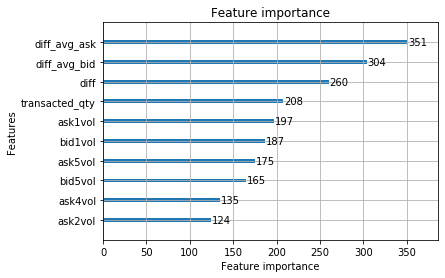

In [0]:
import matplotlib.pyplot as plt
import lightgbm as lgb
d_train = lgb.Dataset(X_train, label=y_train)
param = {"max_depth": 5, "learning_rate": 0.1, "num_leaves": 900, "n_estimators": 100}
model2 = lgb.train(params=param,train_set=d_train)
# print(‘Plot feature importances…’)
ax = lgb.plot_importance(model2, max_num_features=10)
plt.show()

In [0]:
print(X_train.columns)

Index(['last_price', 'mid', 'opened_position_qty ', 'closed_position_qty',
       'transacted_qty', 'd_open_interest', 'bid1', 'bid2', 'bid3', 'bid4',
       'bid5', 'ask1', 'ask2', 'ask3', 'ask4', 'ask5', 'bid1vol', 'bid2vol',
       'bid3vol', 'bid4vol', 'bid5vol', 'ask1vol', 'ask2vol', 'ask3vol',
       'ask4vol', 'ask5vol', 'diff', 'avg_bid', 'avg_ask', 'diff_avg_bid',
       'diff_avg_ask', 'diff_avg_bid_ask', 'effective_spread'],
      dtype='object')


Index(['last_price', 'mid', 'opened_position_qty ', 'closed_position_qty',
       'transacted_qty', 'd_open_interest', 'bid1', 'bid2', 'bid3', 'bid4',
       'bid5', 'ask1', 'ask2', 'ask3', 'ask4', 'ask5', 'bid1vol', 'bid2vol',
       'bid3vol', 'bid4vol', 'bid5vol', 'ask1vol', 'ask2vol', 'ask3vol',
       'ask4vol', 'ask5vol', 'diff', 'avg_bid', 'avg_ask', 'diff_avg_bid',
       'diff_avg_ask', 'effective_spread'],
      dtype='object')


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


<Figure size 7200x1800 with 0 Axes>

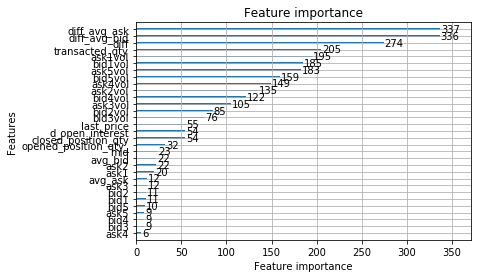

In [0]:
import matplotlib.pyplot as plt
import lightgbm as lgb
d_train = lgb.Dataset(X_train, label=y_train)
print(X_train.columns)
param = {"max_depth": 5, "learning_rate": 0.1, "num_leaves": 900, "n_estimators": 100}
model2 = lgb.train(params=param,train_set=d_train)
# print(‘Plot feature importances…’)
plt.figure(figsize=(100,25))
ax = lgb.plot_importance(model2, max_num_features=34)
plt.show()

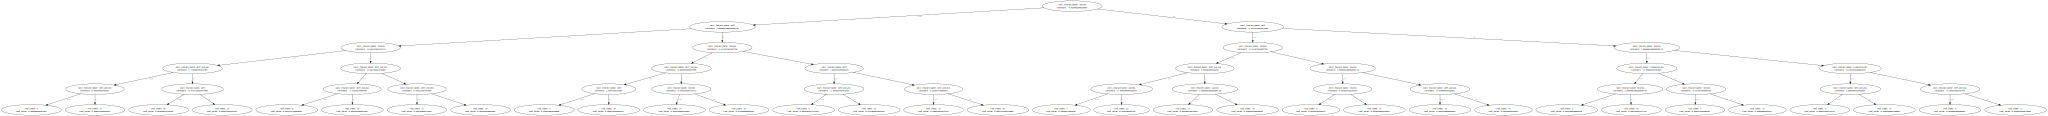

In [0]:

lgb.create_tree_digraph(model2)

In [0]:
#check eff sprread
print(X_train.columns)
d_train = lgb.Dataset(X_train, label=y_train)
param = {"max_depth": 5, "learning_rate": 0.1, "num_leaves": 900, "n_estimators": 100}
model2 = lgb.train(params=param,train_set=d_train)
# print(‘Plot feature importances…’)
plt.figure(figsize=(50,25))
ax = lgb.plot_importance(model2, max_num_features=33)
plt.show()

NameError: ignored

In [0]:
model_3 = Sequential([
      Dense(1000, activation='relu',input_shape=(21,)),
      Dropout(0.2),
      Dense(500, activation='relu'),
      Dropout(0.1),
      Dense(200, activation='relu'),
      Dense(1, activation='sigmoid'),
  ])
model_3.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
hist_3 = model_3.fit(X_train, y_train,
            batch_size=32, epochs=10,
            validation_data=(X_test, y_test))

NameError: ignored

In [0]:
model_3 = Sequential([
      Dense(5000, activation='relu',input_shape=(21,)),
      Dropout(0.1),
      Dense(5000, activation='relu'),
      Dropout(0.1),
      Dense(5000, activation='relu'),
      Dense(1, activation='sigmoid'),
  ])
model_3.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy',auroc])
hist_3 = model_3.fit(X_train, y_train,
            batch_size=32, epochs=10,
            validation_data=(X_test, y_test))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 473904 samples, validate on 118476 samples
Epoch 1/10
 54336/473904 [==>...........................] - ETA: 2:54:38 - loss: 0.6305 - acc: 0.6532 - auroc: 0.6433

In [0]:





import tensorflow as tf

probbs = model_3.predict_proba(X_test)
from sklearn.metrics import roc_auc_score

def auroc(y_true, y_pred):
    return tf.py_func(roc_auc_score, (y_true, y_pred), tf.double)

auroc(y_test,probbs)







Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    


<tf.Tensor 'PyFunc:0' shape=<unknown> dtype=float64>

In [0]:
#predict on test
test_df = pd.read_csv('test.csv')

df_test = test_df.fillna(test_df.median())


df_test['diff'] = (df_test['last_price'] - df_test['mid'])
df_test['avg_bid'] = (df_test['bid1'] * df_test['bid1vol'] + df_test['bid2'] * df_test['bid2vol'] + df_test['bid3'] * df_test['bid3vol'] + df_test['bid4'] * df_test['bid4vol'] + df_test['bid5'] * df_test['bid5vol']) / (df_test['bid1vol'] + df_test['bid2vol'] + df_test['bid3vol'] + df_test['bid4vol'] + df_test['bid5vol'])
df_test['avg_ask'] = (df_test['ask1'] * df_test['ask1vol'] + df_test['ask2'] * df_test['ask2vol'] + df_test['ask3'] * df_test['ask3vol'] + df_test['ask4'] * df_test['ask4vol'] + df_test['ask5'] * df_test['ask5vol']) / (df_test['ask1vol'] + df_test['ask2vol'] + df_test['ask3vol'] + df_test['ask4vol'] + df_test['ask5vol'])
df_test['diff_avg_bid'] = (df_test['mid'] - df_test['avg_bid'])
df_test['diff_avg_ask'] = (df_test['mid'] - df_test['avg_ask'])
df_test = df_test.drop(['id', 'bid1', 'bid2', 'bid3', 'bid4', 'bid5', 'ask1', 'ask2','ask3','ask4','ask5'], axis=1)
normalized_X_test =(df_test-df_test.mean())/df_test.std()
probbs = model_3.predict_proba(normalized_X_test)
test_df['Predicted'] = probbs
header = ["id", "Predicted"]
test_df.to_csv('output.csv', columns = header,index=False)


NameError: ignored

In [0]:
normalized_X.columns

In [0]:





normalized_X_test.columns

Index(['Predicted', 'ask1vol', 'ask2vol', 'ask3vol', 'ask4vol', 'ask5vol',
       'avg_ask', 'avg_bid', 'bid1vol', 'bid2vol', 'bid3vol', 'bid4vol',
       'bid5vol', 'closed_position_qty', 'd_open_interest', 'diff',
       'diff_avg_ask', 'diff_avg_bid', 'last_price', 'mid',
       'opened_position_qty ', 'probs', 'transacted_qty'],
      dtype='object')

In [0]:
np.array(test_df['id'],probbs)

TypeError: ignored

In [0]:
test_df['Predicted'] = probbs

In [0]:
len(test_df['id'])

191859

In [0]:
len(probbs)

592380

In [0]:
test_df['Predicted'] = probbs
header = ["id", "Predicted"]
test_df.to_csv('output.csv', columns = header,index=False)

In [0]:
pd.read_csv('output.csv')

,id,Predicted
0,592380,2.704272e-01
1,592381,0.000000e+00
2,592382,0.000000e+00
3,592383,7.152557e-05
4,592384,0.000000e+00
...,...,...
191854,784234,5.960464e-08
191855,784235,0.000000e+00
191856,784236,0.000000e+00
191857,784237,0.000000e+00


In [0]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
rfc = RandomForestClassifier(n_estimators=1000, n_jobs=-1, class_weight='balanced')
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2)
# x=X_train.iloc[:,:].values
# y=y_train.iloc[:,0].values
boruta_selector.fit(X_train.values,y_train.values)
# print(“==============BORUTA==============”)
print (boruta_selector.n_features_)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	32
Rejected: 	0


KeyboardInterrupt: ignored

In [0]:
pip install boruta

     |████████████████████████████████| 61kB 5.2MB/s 
